# SVM Evaluation Notebook: Text Classification with TF-IDF

### Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Step 2: Load Dataset from "dataset/data.csv"

In [3]:
df = pd.read_csv("dataset/data.csv")
print("Dataset loaded. Shape:", df.shape)
print(df.head())

Dataset loaded. Shape: (39942, 5)
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


### Step 3: Split raw data before any preprocessing

In [4]:
X = df['text'].astype(str)
y = df['label']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Data split complete. Train size:", len(X_train_text), "Test size:", len(X_test_text))

Data split complete. Train size: 31953 Test size: 7989


### Step 3: Preprocess the Data

In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

X_train_clean = X_train_text.apply(clean_text)
print("Training text preprocessed.")

Training text preprocessed.


### Step 4: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train the SVM Model

In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Linear SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
print("Linear SVM model trained successfully.")

Linear SVM model trained successfully.


### Step 6: Make Predictions

In [10]:
# Ensure X_test is transformed using the TfidfVectorizer before prediction
y_pred = svm_model.predict(X_test_tfidf)

### Step 7: Evaluation

In [11]:
print("\nEvaluation Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Evaluation Results:
Confusion Matrix:
[[3975   21]
 [  14 3979]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3996
           1       0.99      1.00      1.00      3993

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989

Accuracy Score: 0.9956189760921267


### Step 8: Confusion Matrix Plot

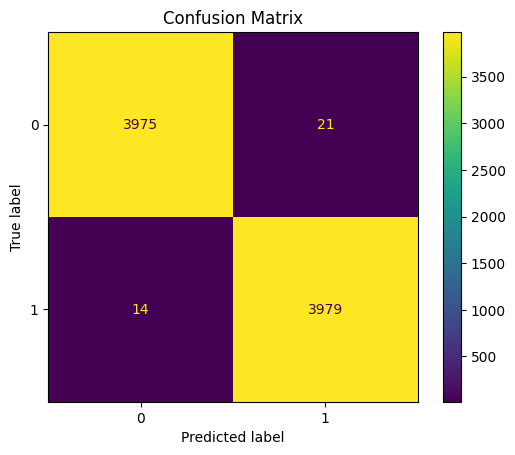

In [12]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()